MNIST Handwritten Digit Classification using PyTorch

In [ ]:
import torch as torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

1. Loading you MNIST dataset for the data loader

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

2. Visualize several mnist datasets

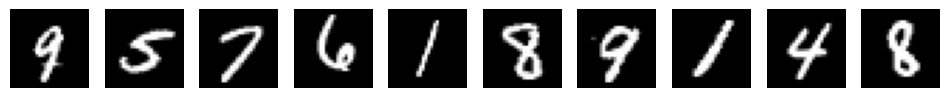

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#Define a function to plot images
def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

#Get some images from the datasets
images, labels = next(iter(train_loader))
plot_images(images[:10])

3. Design your Neural Network model

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 50)
    self.final = nn.Linear(50, 10)
    self.relu = nn.ReLU()

  def forward(self, img): #convert + flatten
    x = img.view(-1, 28*28)
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.final(x)
    return x
net = Net()



4. Setup your hyperparameter such as Loss Function, Optimizer,
Learning Rate, etc

In [ ]:
cross_el = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) #e-1
epoch = 20

5. Develop a training loop and run a training model

In [ ]:
for epoch in range(epoch):
  net.train()
  running_loss = 0.0

  for data in train_loader:
    x, y = data
    optimizer.zero_grad()
    output = net(x.view(-1, 28*28))
    loss = cross_el(output, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'[{epoch + 1}, {epoch +1:5d}] loss: {running_loss / 2000:.5f}')

[1,     1] loss: 1.01640
[2,     2] loss: 0.53455
[3,     3] loss: 0.42816
[4,     4] loss: 0.37448
[5,     5] loss: 0.33334
[6,     6] loss: 0.30570
[7,     7] loss: 0.29149
[8,     8] loss: 0.26396
[9,     9] loss: 0.25781
[10,    10] loss: 0.23979
[11,    11] loss: 0.23949
[12,    12] loss: 0.21399
[13,    13] loss: 0.21345
[14,    14] loss: 0.20558
[15,    15] loss: 0.20282
[16,    16] loss: 0.18980
[17,    17] loss: 0.18101
[18,    18] loss: 0.17837
[19,    19] loss: 0.17464
[20,    20] loss: 0.17129


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1


6. Evaluate the Model using several performance metrics such as
accuracy, confusion matrix, F1 Score, Precision, Recall, etc

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#accuracy
accuracy = correct / total
print('Accuracy:', accuracy)

#confusion matrix
y_true = []
y_pred = []

with torch.no_grad():
  for data in test_loader:
    x, y = data
    output = net(x.view(-1, 784))
    for idx, i in enumerate(output):
      y_true.append(y[idx].item())
      y_pred.append(torch.argmax(i).item())

confusion_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(confusion_matrix)

#precision
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision:', precision)

#Recall
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall:', recall)

#Fl Score
f1_score = f1_score(y_true, y_pred, average='weighted')
print('F1 Score', f1_score)

Accuracy: 0.98055
Confusion Matrix:
[[5847    3    2    1    2   16   12    5   29    6]
 [   0 6731    0    6    2    2    0    0    1    0]
 [   8   52 5719   36   14   10   21   35   52   11]
 [   0   13   10 5956    7   55    1   28   27   34]
 [   2    7    0    0 5808    0    5    3    1   16]
 [   1    1    0    8    3 5363   23    5    8    9]
 [  12    4    1    0    4   26 5862    0    7    2]
 [   1   59   20    2    9    0    0 6104    4   66]
 [   1   48    1   15   20   38   10    8 5669   41]
 [   9    8    0   14  114    5    2   22    1 5774]]
Precision: 0.9806768063349421
Recall: 0.98055
F1 Score 0.9805322163196211


7. Describe and explain your Result

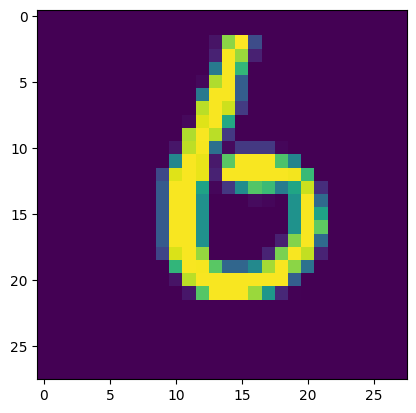

tensor(6)


In [ ]:
plt.imshow(x[3].view(28, 28))
plt.show()
print(torch.argmax(net(x[3].view(-1, 784))[0]))